## Final Project Submission

Please fill out:
* Student name: Christine Malinga
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:N/A


## Import Libraries

In [1]:
import pandas as pd #to work with dataframes
import numpy as np #for any and all calculations
import sqlite3 #for working with SQL files to make dataframes

For this project, we'll be importing a variety of files to gather important data:

movieinfo: contains runtime, genres, and other details about movies.
reviews: provides ratings for movies along with written reviews, but we'll focus on the ratings only.
tmdb_movies: includes release dates and other information.
tn_movie_budgets: a key source for financial data such as production costs and revenue.
imdb_db: offers a wealth of information including ratings, titles, genres, and director details.







In [5]:
import os
import sqlite3
import pandas as pd
import zipfile

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')
#import data from rt.movie_info.tsv.gz
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")
#rt.reviews.tsv.gz
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')
#bom.movie_gross.csv.gz
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
#tmdb.movies.csv.gz
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
#tn.movie_budgets.csv.gz
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')



### Let's begin by examining the first few files

In [10]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### let's merge them

In [12]:
ratings_and_beyond = reviews.merge(movie_info[['rating', 'genre', 'runtime', 'id']], on = 'id', how = 'left')
ratings_and_beyond = ratings_and_beyond.merge(tmdb[['title', 'id']], on = 'id', how = 'left')
ratings_and_beyond = ratings_and_beyond.rename(columns={"id": "Id"}, errors="raise")
ratings_and_beyond

,Id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime,title
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",R,Drama|Science Fiction and Fantasy,108 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
54582,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",R,Action and Adventure|Art House and Internation...,94 minutes,NaN
54583,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",R,Action and Adventure|Art House and Internation...,94 minutes,NaN
54584,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",R,Action and Adventure|Art House and Internation...,94 minutes,NaN
54585,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",R,Action and Adventure|Art House and Internation...,94 minutes,NaN


In [13]:
###convert date to just month, runtime to just minutes
ratings_and_beyond['date'] = pd.to_datetime(ratings_and_beyond['date'])
ratings_and_beyond['runtime'] = ratings_and_beyond['runtime'].str.replace(" minutes","")
ratings_and_beyond['runtime'] = pd.to_numeric(ratings_and_beyond['runtime'], downcast="integer")

###Nans need to be fixed

###Swap out Nans for average of the runtime column (only about 800 entries of over 54 thousand)
ratings_and_beyond['runtime'].fillna((ratings_and_beyond['runtime'].mean()), inplace=True)
ratings_and_beyond['runtime'] = ratings_and_beyond['runtime'].astype(int)

ratings_and_beyond

,Id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime,title
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,R,Drama|Science Fiction and Fantasy,108,NaN
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23,R,Drama|Science Fiction and Fantasy,108,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04,R,Drama|Science Fiction and Fantasy,108,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16,R,Drama|Science Fiction and Fantasy,108,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12,R,Drama|Science Fiction and Fantasy,108,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
54582,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,2002-09-24,R,Action and Adventure|Art House and Internation...,94,NaN
54583,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,2005-09-21,R,Action and Adventure|Art House and Internation...,94,NaN
54584,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,2005-07-17,R,Action and Adventure|Art House and Internation...,94,NaN
54585,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,2003-09-07,R,Action and Adventure|Art House and Internation...,94,NaN



### Standardizing the ratings...
Let's examine the structure of the rating_x column to understand how feasible it is to convert the cells to a uniform format.

In [14]:
ratings_and_beyond['rating_x'].value_counts()

rating_x
3/5       4335
4/5       3674
3/4       3579
2/5       3173
2/4       2736
          ... 
3.1/5        1
6.2/10       1
2.6/5        1
9.7          1
3 1/2        1
Name: count, Length: 186, dtype: int64

### Adjusting the approach...
The wide variety of rating types in ratings_and_beyond is causing challenges given our time constraints and the limitations of our knowledge base. Instead, we should prioritize using the ratings from our IMDB file, which is featured later in the dataset. Now, let's shift our focus to tn_movie_budgets, which provides valuable financial information.

In [15]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Let's convert selected currency values to floats and streamline the titles in the tn_movie_budgets dataset.

In [19]:
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets = budgets.rename(columns={"movie": "title"}, errors="raise")
tn_movie_budgets.columns = tn_movie_budgets.columns.str.capitalize()
tn_movie_budgets

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [20]:
tn_movie_budgets_the_runaways = tn_movie_budgets[tn_movie_budgets['Title'].str.contains('Runaways')]
tn_movie_budgets_the_runaways

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross
3756,57,"Mar 19, 2010",The Runaways,9500000.0,3573673.0,5278632.0


### Now, let's combine tn_movie_budgets with some other datasets

In [21]:
movie_budgets = tn_movie_budgets.merge(ratings_and_beyond[['rating_x', 'rating_y', 'Id']], on = 'Id', how = 'left')
movie_budgets = movie_budgets.drop_duplicates(subset=['Title'], inplace=False)
movie_budgets = movie_budgets.rename(columns={"rating_x": "rt_rating", "rating_y": "pa_rating"}, errors="raise")
movie_budgets['Release_date'] = pd.to_datetime(movie_budgets['Release_date']).dt.month
movie_budgets

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross,rt_rating,pa_rating
0,1,12,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN,NaN
2,3,6,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,3/5,R
165,4,5,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN,NaN
166,5,12,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,R
...,...,...,...,...,...,...,...,...
187277,78,12,Red 11,7000.0,0.0,0.000000e+00,NaN,NaN
187278,79,4,Following,6000.0,48482.0,2.404950e+05,B-,R
187296,80,7,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,B-,NR
187311,81,9,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,NaN


In [29]:
print("Parental advisory Nans:", movie_budgets['pa_rating'].isna().sum(), "of", movie_budgets.shape[0])
print("Rotten Tomatoes Nans:", movie_budgets['rt_rating'].isna().sum(), "of", movie_budgets.shape[0])

Parental advisory Nans: 2391 of 5698
Rotten Tomatoes Nans: 3416 of 5698


### Observation
Since almost half of the parental advisory cells consist of NaN values, and well over half of the Rotten Tomatoes ratings are also NaN, I've decided to proceed with using other available data to extract insights.







Now that we have our movie_budgets and ratings_and_beyond, let's examine our final piece of data.

In [31]:
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')

# Execute the SQL query
imdb_db2 = pd.read_sql("""
SELECT 
    movie_basics.primary_title,
    movie_basics.original_title,
    movie_ratings.averagerating,
    movie_basics.runtime_minutes,
    movie_basics.start_year,
    movie_basics.genres, 
    movie_akas.region,
    principals.category, 
    persons.primary_name
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
JOIN movie_akas
    USING (movie_id)
JOIN principals
    USING (movie_id)
JOIN persons
    USING (person_id)
WHERE category = "director";
""", con)

imdb_db2 = imdb_db2.rename(columns={"primary_title": "Title"}, errors="raise")
imdb_db2


,Title,original_title,averagerating,runtime_minutes,start_year,genres,region,category,primary_name
0,The Wicker Tree,The Wicker Tree,3.9,96.0,2011,"Drama,Horror",None,director,Robin Hardy
1,The Wicker Tree,The Wicker Tree,3.9,96.0,2011,"Drama,Horror",BR,director,Robin Hardy
2,The Wicker Tree,The Wicker Tree,3.9,96.0,2011,"Drama,Horror",GB,director,Robin Hardy
3,The Wicker Tree,The Wicker Tree,3.9,96.0,2011,"Drama,Horror",GB,director,Robin Hardy
4,The Wicker Tree,The Wicker Tree,3.9,96.0,2011,"Drama,Horror",GB,director,Robin Hardy
...,...,...,...,...,...,...,...,...,...
278705,A Russian Youth,Malchik russkiy,6.6,72.0,2019,"Drama,War",None,director,Alexander Zolotukhin
278706,A Russian Youth,Malchik russkiy,6.6,72.0,2019,"Drama,War",FR,director,Alexander Zolotukhin
278707,A Russian Youth,Malchik russkiy,6.6,72.0,2019,"Drama,War",RU,director,Alexander Zolotukhin
278708,A Russian Youth,Malchik russkiy,6.6,72.0,2019,"Drama,War",RU,director,Alexander Zolotukhin


### Let's merge it with our movie budgets data.

In [32]:
merge_it = movie_budgets.merge(imdb_db2[['averagerating', 'runtime_minutes', 'genres', 'Title']], on = 'Title', how = 'left')
merge_it = merge_it.drop_duplicates(subset=['Title'], inplace=False)
merge_it

,Id,Release_date,Title,Production_budget,Domestic_gross,Worldwide_gross,rt_rating,pa_rating,averagerating,runtime_minutes,genres
0,1,12,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,6.1,93.0,Horror
3,2,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,NaN,NaN,6.6,136.0,"Action,Adventure,Fantasy"
49,3,6,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,3/5,R,6.0,113.0,"Action,Adventure,Sci-Fi"
84,4,5,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,NaN,NaN,7.3,141.0,"Action,Adventure,Sci-Fi"
125,5,12,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
50205,78,12,Red 11,7000.0,0.0,0.000000e+00,NaN,NaN,5.6,77.0,"Horror,Sci-Fi,Thriller"
50208,79,4,Following,6000.0,48482.0,2.404950e+05,B-,R,NaN,NaN,NaN
50209,80,7,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,B-,NR,NaN,NaN,NaN
50210,81,9,A Plague So Pleasant,1400.0,0.0,0.000000e+00,NaN,NaN,5.4,76.0,"Drama,Horror,Thriller"


### Let's now use all those dataframes to perform some advanced analysis and create insightful visualizations

In [33]:
import matplotlib.pyplot as plt

### Exploring Financial Aspects...

* Budget Analysis: Worst Case, Best Case, Average Case
* Budget vs. Return on Investment (ROI)
* Budget vs. Gross Worldwide Revenue
* Release Date vs. Domestic Gross Revenue

## Budgets - Worst Case, Best Case, Average Case

In [34]:
bghighlow = merge_it[['Production_budget']].copy()
bghighlow= bghighlow.reset_index()
bghighlow = bghighlow.astype(float)
bghighlow = bghighlow//1000000 ###divided by 1 million for simplicity in reading

bghighlow

,index,Production_budget
0,0.0,425.0
1,0.0,410.0
2,0.0,350.0
3,0.0,330.0
4,0.0,317.0
...,...,...
5693,0.0,0.0
5694,0.0,0.0
5695,0.0,0.0
5696,0.0,0.0


In [36]:
import numpy as np

# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = bghighlow['Production_budget'].quantile(0.25)
Q3 = bghighlow['Production_budget'].quantile(0.75)
IQR = Q3 - Q1

print("Old Shape:", bghighlow.shape)

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers
bghighlow = bghighlow[(bghighlow['Production_budget'] >= lower_bound) & (bghighlow['Production_budget'] <= upper_bound)]

print("New Shape:", bghighlow.shape)


Old Shape: (5269, 2)
New Shape: (5165, 2)


In [44]:
# Data type and shape
print("Data type of 'Production_budget' column:", bghighlow['Production_budget'].dtype)
print("Shape of 'bghighlow' DataFrame:", bghighlow.shape)

# Budget summary
print("\nMinimum budget:", "$", "{:.2f}".format(float(bghighlow['Production_budget'].min())), "million.")
print("Maximum budget:", "$", "{:.2f}".format(float(bghighlow['Production_budget'].max())), "million.")
print("Median budget:", "$", "{:.2f}".format(float(bghighlow['Production_budget'].median())), "million.")
print("Average budget:", "$", "{:.2f}".format(float(bghighlow['Production_budget'].mean())), "million.")


Data type of 'Production_budget' column: float64
Shape of 'bghighlow' DataFrame: (5165, 2)

Minimum budget: $ 0.00 million.
Maximum budget: $ 81.00 million.
Median budget: $ 15.00 million.
Average budget: $ 20.83 million.


### Conclusion
Average budget is 21 million USD

### Budget vs. Gross Worldwide

In [45]:
# budget and how compares to gross worldwide

bghighlow_wg = movie_budgets[['Production_budget', 'Worldwide_gross']].copy()
bghighlow_wg = bghighlow_wg.reset_index() #let's clean up this index!
bghighlow_wg = bghighlow_wg.sort_values(by="Production_budget")
bghighlow_wg = bghighlow_wg.astype(float)
bghighlow_wg = bghighlow_wg//1000000 ###divided by 1 million for simplicity in reading
bghighlow_wg

,index,Production_budget,Worldwide_gross
5697,0.0,0.0,0.0
5696,0.0,0.0,0.0
5695,0.0,0.0,0.0
5694,0.0,0.0,0.0
5692,0.0,0.0,0.0
...,...,...,...
4,0.0,317.0,1316.0
3,0.0,330.0,1403.0
2,0.0,350.0,149.0
1,0.0,410.0,1045.0


In [48]:
#Let's simplify by taking out some of the outliers 

# IQR calculation
Q1 = np.percentile(bghighlow_wg['Production_budget'], 25, method='midpoint')
Q3 = np.percentile(bghighlow_wg['Production_budget'], 75, method='midpoint')
IQR = Q3 - Q1

print("Old Shape:", bghighlow_wg.shape)

# Upper and lower bounds for outliers
upper = np.where(bghighlow_wg['Production_budget'] >= (Q3 + 1.5 * IQR))
lower = np.where(bghighlow_wg['Production_budget'] <= (Q1 - 1.5 * IQR))

# Removing outliers
bghighlow_wg.drop(upper[0], inplace=True)
bghighlow_wg.drop(lower[0], inplace=True)

print("New Shape:", bghighlow_wg.shape)


Old Shape: (4864, 3)
New Shape: (4512, 3)


In [49]:
bghighlow_wg_mean = bghighlow_wg.groupby('Production_budget').mean()
bghighlow_wg_mean['Production_budget'] = bghighlow_wg_mean.index
print("With a budget of", bghighlow['Production_budget'].mean().round(decimals = 0), "million dollars, you can expect an average worldwide gross of",bghighlow_wg_mean['Worldwide_gross'][23].round(2), "million dollars.")


With a budget of 21.0 million dollars, you can expect an average worldwide gross of 72.21 million dollars.


In [50]:
bghighlow_wg

,index,Production_budget,Worldwide_gross
4450,0.0,4.0,9.0
4451,0.0,4.0,19.0
4452,0.0,4.0,11.0
4453,0.0,4.0,8.0
4454,0.0,4.0,10.0
...,...,...,...
4,0.0,317.0,1316.0
3,0.0,330.0,1403.0
2,0.0,350.0,149.0
1,0.0,410.0,1045.0


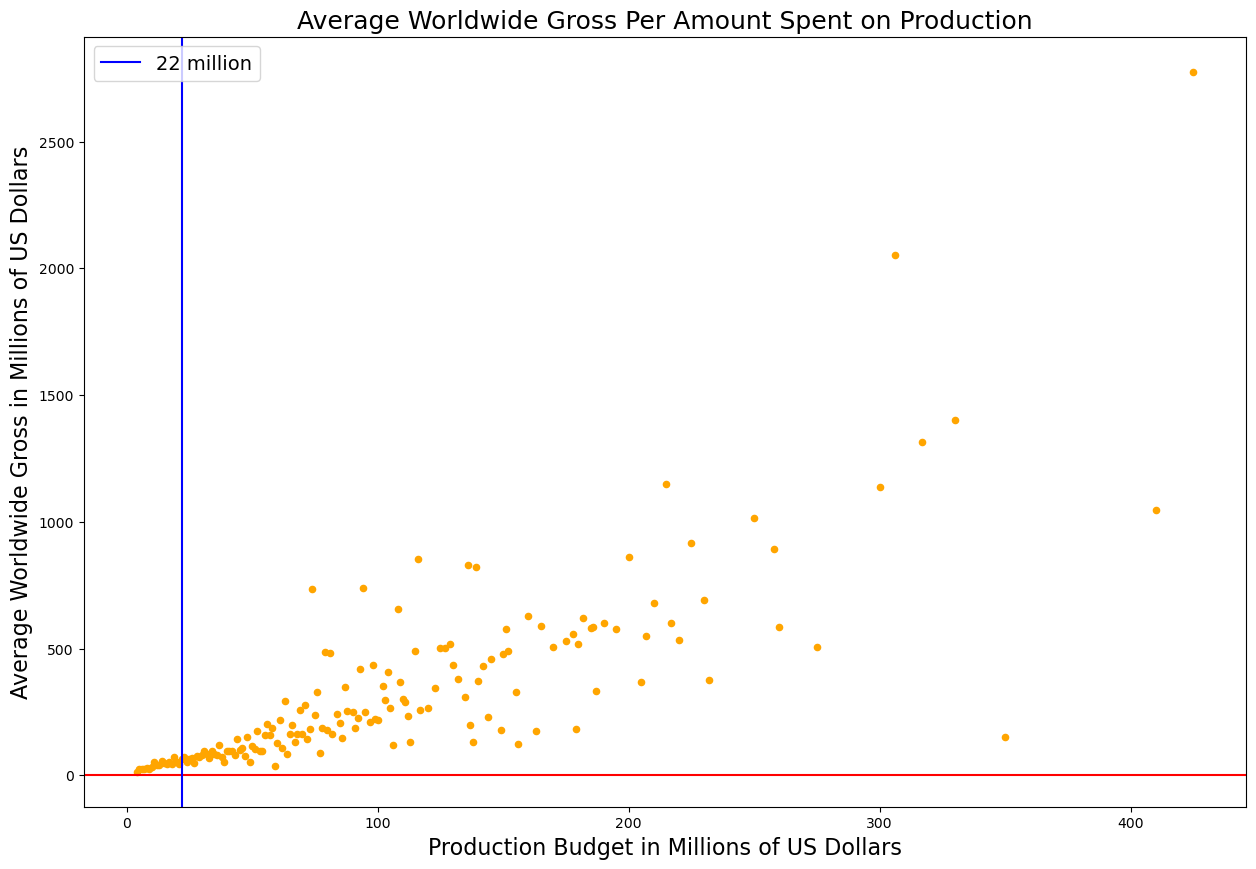

In [51]:
# Plotting the scatter plot
ax = bghighlow_wg_mean.plot.scatter(figsize=(15,10), x='Production_budget', y='Worldwide_gross', color='orange')
plt.title('Average Worldwide Gross Per Amount Spent on Production', fontsize=18)
plt.xlabel('Production Budget in Millions of US Dollars', fontsize=16)
plt.ylabel('Average Worldwide Gross in Millions of US Dollars', fontsize=16)

# Adding horizontal and vertical lines
plt.axhline(y=0, color='red', linestyle='-')
plt.axvline(x=22, color='blue', label='22 million')
plt.legend(loc='upper left', prop={"size": 14})

# Saving the plot as a PNG file
plt.savefig('average_worldwide_gross.png')
plt.show()



### Conclusion
This analysis suggests a trend where higher budgets are associated with higher gross revenue—indicating that investing more upfront can lead to higher returns. However, this correlation weakens for budgets exceeding around 32 million, leading to greater variance in outcomes.

## Budget vs. ROI

In [59]:
bghighlow_dg = merge_it[['Production_budget', 'Domestic_gross']].copy()
bghighlow_dg['ROI'] = bghighlow_dg['Domestic_gross'] - bghighlow_dg['Production_budget']
bghighlow_dg= bghighlow_dg.reset_index()
bghighlow_dg = bghighlow_dg.astype(float)
bghighlow_dg = bghighlow_dg//1000000 ###divided by 1 million for simplicity in reading

bghighlow_dg

,index,Production_budget,Domestic_gross,ROI
0,0.0,425.0,760.0,335.0
1,0.0,410.0,241.0,-170.0
2,0.0,350.0,42.0,-308.0
3,0.0,330.0,459.0,128.0
4,0.0,317.0,620.0,303.0
...,...,...,...,...
5693,0.0,0.0,0.0,-1.0
5694,0.0,0.0,0.0,0.0
5695,0.0,0.0,0.0,-1.0
5696,0.0,0.0,0.0,-1.0


In [62]:
# Let's simplify by taking out some of the outliers 

# Detection:
# IQR
Q1 = np.percentile(bghighlow_dg['Production_budget'], 25, interpolation='midpoint')
Q3 = np.percentile(bghighlow_dg['Production_budget'], 75, interpolation='midpoint')
IQR = Q3 - Q1

# Check it!
print("Old Shape: ", bghighlow_dg.shape)

# Upper bound
upper_bound = Q3 + 1.5 * IQR
upper_outliers = bghighlow_dg[bghighlow_dg['Production_budget'] > upper_bound]

# Remove the outliers!!!
bghighlow_dg = bghighlow_dg[bghighlow_dg['Production_budget'] <= upper_bound]

# Check it!
print("New Shape: ", bghighlow_dg.shape)




Old Shape:  (5269, 4)
New Shape:  (5165, 4)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3056\875673050.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(bghighlow_dg['Production_budget'], 25, interpolation='midpoint')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3056\875673050.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(bghighlow_dg['Production_budget'], 75, interpolation='midpoint')


In [63]:
bghighlow_dg_mean = bghighlow_dg.copy()
bghighlow_dg_mean = bghighlow_dg_mean.drop(columns='Domestic_gross')
bghighlow_dg_mean = bghighlow_dg_mean.groupby('Production_budget').mean()
bghighlow_dg_mean['Production_budget'] = bghighlow_dg_mean.index

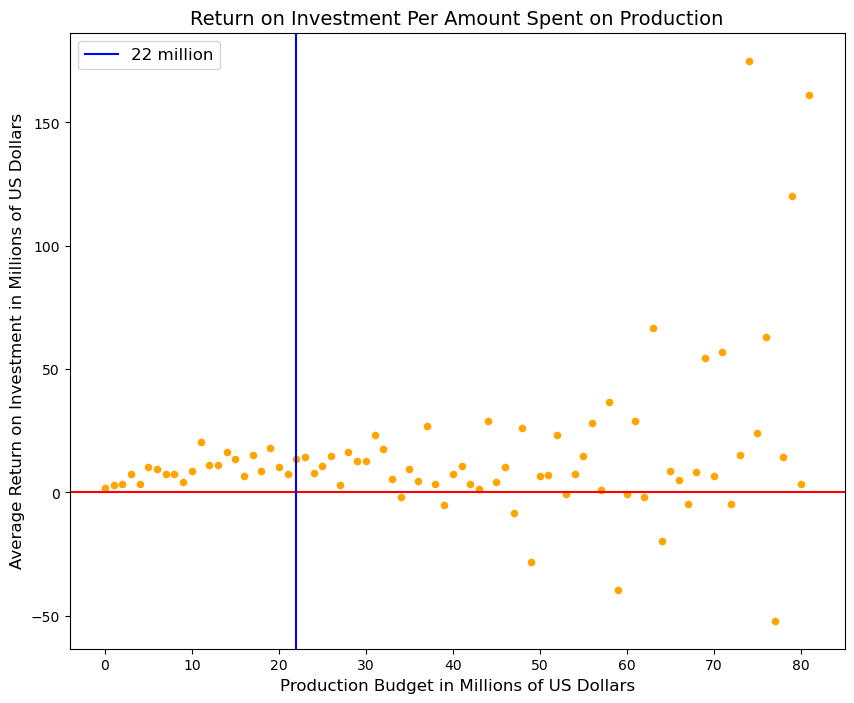

In [66]:
import matplotlib.pyplot as plt

# Scatter plot
bghighlow_dg_mean.plot.scatter(figsize=(10, 8), x='Production_budget', y='ROI', color='orange')
plt.title('Return on Investment Per Amount Spent on Production', fontsize=14)
plt.xlabel('Production Budget in Millions of US Dollars', fontsize=12)
plt.ylabel('Average Return on Investment in Millions of US Dollars', fontsize=12)

# Horizontal line at y=0 in red
plt.axhline(y=0, color='r', linestyle='-')

# Vertical line at x=22 in blue
plt.axvline(x=22, color='b', label='22 million')

plt.legend(loc='upper left', fontsize=12)

# Save the plot as a PNG
plt.savefig('roi_vs_budget.png')
plt.show()


In [67]:
bghighlow_dg_mean['ROI'][23].round(1)##our average, plus one to accound for the index value of 0

14.5

### Conclusion
The data indicates a consistent average return on investment (ROI) up to approximately $30 million. Beyond this point, the results become more unpredictable, with the potential for both significant profits and losses. For a budget of $22 million, the average ROI is expected to be around $14.5 million.

### Release Date vs. Domestic Gross

In [68]:
released_dg = movie_budgets[['Release_date', 'Domestic_gross']].copy()
released_dg_avg = released_dg.groupby('Release_date')['Domestic_gross'].mean()
released_dg_avg = released_dg_avg.round(decimals = 0)
released_dg_avg = released_dg_avg.astype(float)
released_dg_avg = released_dg_avg//1000000 ###divided by 1 million for simplicity in reading
#released_dg_avg = released_dg_avg.dt.month_name()
released_dg_avg = released_dg_avg.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })
released_dg_avg

Release_date
Jan     23.0
Feb     35.0
Mar     38.0
Apr     27.0
May     66.0
Jun     66.0
July    60.0
Aug     32.0
Sep     23.0
Oct     24.0
Nov     57.0
Dec     46.0
Name: Domestic_gross, dtype: float64

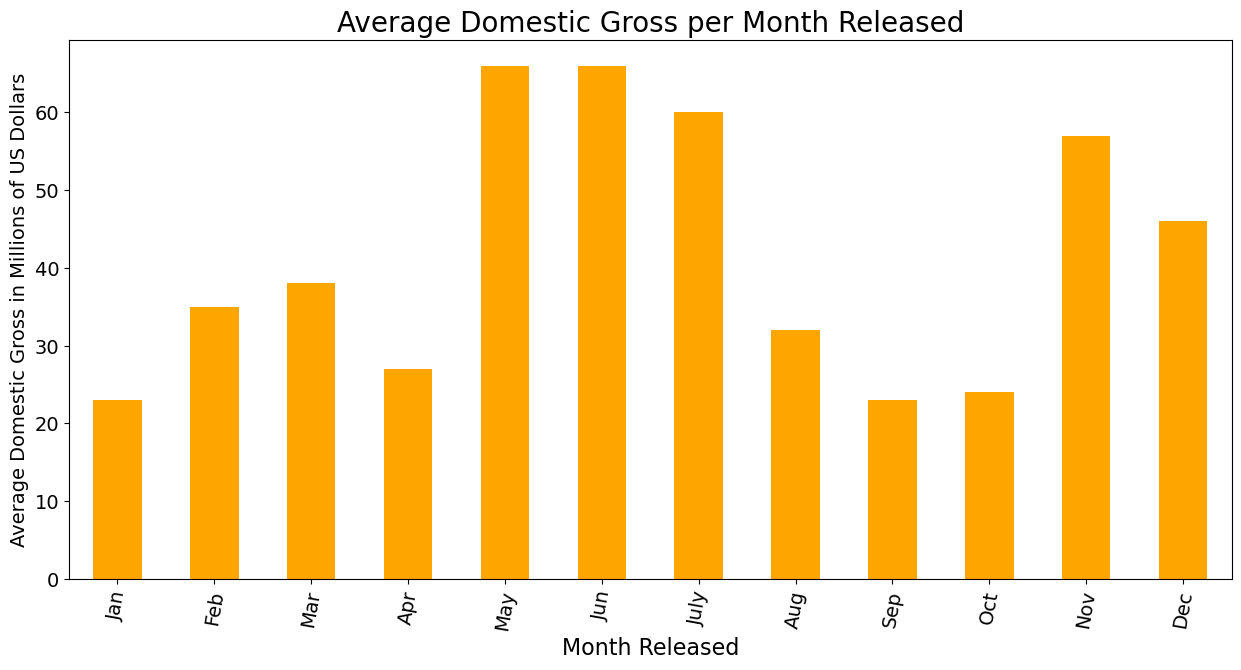

In [71]:
released_dg_avg.plot.bar(
    figsize=(15,7), 
    x="Month Released", 
    y="Domestic Gross in Millions", 
    rot=80,  
    color='orange',
    fontsize = 14);
plt.title("Average Domestic Gross per Month Released", fontsize=20)
plt.xlabel('Month Released', fontsize=16)
plt.ylabel('Average Domestic Gross in Millions of US Dollars', fontsize=14)
plt.savefig('average_domestic_gross.png')


### Conclusion:
The analysis suggests that the optimal months to release a movie are May and June, during the summer season, closely followed by July. For releases outside of these months, November seems to be the next best option.

### The What, Who, and How - merge_it
* Average Domestic Gross per Genre
* Average Rating vs. Runtime
* Average Domestic Gross by Average Rating
* Average Rating per Director

## Average Domestic Gross Per Genre

In [72]:
avrgrs_genre = merge_it[['genres', 'Domestic_gross']].copy()
avrgrs_genre = avrgrs_genre.dropna(subset=['genres'])
avrgrs_genre = avrgrs_genre[avrgrs_genre.Domestic_gross != 0]


In [73]:
#We have multiple listings in many genres cell, so we want to break it up so we can calculate the mean for each genre
avrgrs_genre

,genres,Domestic_gross
0,Horror,760507625.0
3,"Action,Adventure,Fantasy",241063875.0
49,"Action,Adventure,Sci-Fi",42762350.0
84,"Action,Adventure,Sci-Fi",459005868.0
127,"Action,Adventure,Sci-Fi",678815482.0
...,...,...
50104,Documentary,8374.0
50121,Horror,3632.0
50130,Drama,144822.0
50140,Drama,3547.0


In [74]:
#Make a loop to look for individual genres, make a list, then concat it!
genres=['Romance', 'Family', 'Music', 'Sport', 'Biography', 'History', 'Documentary', 'Mystery', 'Thriller', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Sci-Fi', 'Action', 'Adventure', 'Crime']
Genre_collection = []

for genre in genres:
    ComboGenre = avrgrs_genre[avrgrs_genre['genres'].str.contains(genre)]
    ComboGenre = ComboGenre.drop(columns='genres')
    ComboGenre = ComboGenre.assign(genres=genre)
    Genre_collection.append(ComboGenre)
    
#Now concat it, calculate the mean for each genre, then divide by a million for legibility
grande_avrgrs_genre = pd.concat(Genre_collection)
grande_avrgrs_genre = grande_avrgrs_genre.groupby('genres').mean()
grande_avrgrs_genre['Domestic_gross'] = grande_avrgrs_genre['Domestic_gross']//1000000
grande_avrgrs_genre

,Domestic_gross
genres,
Action,89.0
Adventure,122.0
Biography,37.0
Comedy,57.0
Crime,35.0
Documentary,28.0
Drama,32.0
Family,70.0
Fantasy,78.0


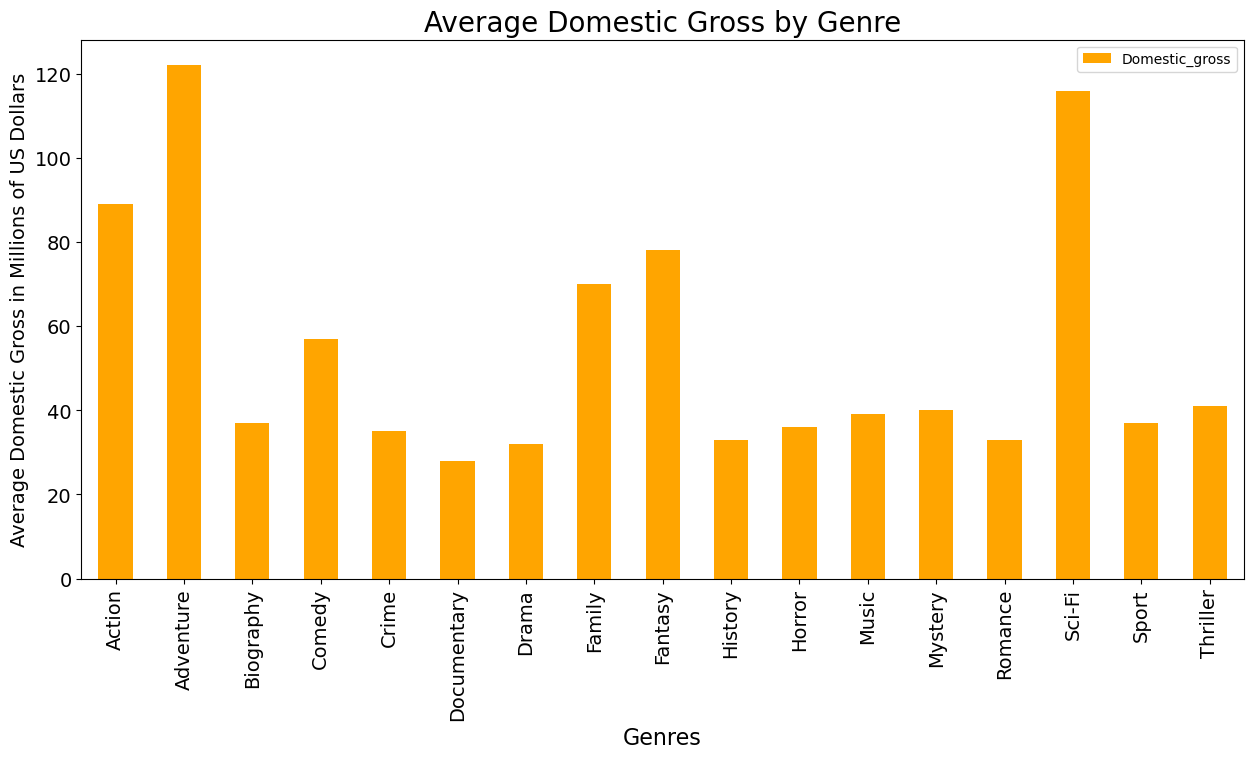

In [77]:
grande_avrgrs_genre.plot.bar(stacked=True, figsize=(15,7), y='Domestic_gross', color='orange', fontsize=14)
plt.title('Average Domestic Gross by Genre', fontsize=20)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Average Domestic Gross in Millions of US Dollars', fontsize=14)
plt.savefig('average_domestic_gross_by_Genre.png')